# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA

import seaborn as sns
%matplotlib inline

In [95]:
df = pd.read_csv('data/cs109a_midterm.csv')

In [96]:
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,9.0,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,0.0,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-1.0,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,11.0,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-4.0,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN


## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.



In [97]:
## 1. create DELAY_OR_NOT
df['DELAY_OR_NOT'] = df['ARRIVAL_DELAY'].apply(lambda x: x >= 15)
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN,False
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,False
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,False
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN,False
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,False


#### 2. List predictors that should not be used
The basic idea here is to drop columns that are reduncdant (contained by other information), unuseful (not related to flight delay intuitively) and information received after departure (otherwise we could calculate the result directly).

DATE: Information in column DATE is already included in MONTH and DAY because these are dates in 2015. So this column can not be used, otherwise there is multicolinearity.

MONTH/DAY/DAY_OF_WEEK: This kinds of date information is useful because delay might depend on weather (affects weather_delay), crowdness of airport and numnber of customers (affects security_delay) etc. So information about date is important.

AIRLINE: important. Since it is related to delay caused by airline (airline_delay).

FLIGHT_NUMBER/ TAIL_NUMBER: unnecessary. The information such as departure time, origin/destination airport and airlines is already included by other information. Also label this number could be difficult and complicated.

ORIGIN_AIRPORT/DESTINATION_AIRPORT: important. Since intuitively delays might be due to the bad operation/management in departure/arrival airport.

DISTANCE: might be useful. Since longer distance can provide the flight some space to adjust the travel length.

SCHE-DEP / SCHEDULED-TIME: might be useful. Since it is related to the airport traffic, travel length, and so on, which are all likely to lead to delay.

SCHED_ARR: can be calculated by SCHE-DEP and SCHEDULED-TIME. So it should be dropped otherwise there is colinearity.

DEPARTURE_DELAY: this is information achieved after departure. It is almost linear to arrival delay, which should not be used.

ELAPSED_TIME: it's a kind of information which can only be achieved after departure. It provides an indirect way to calculate the delay information so we should not use it.

AIR_SYSTEM-DELAY/SECURITY_DELAY/AIRLINE_DELAY/LATE_AIRCRAFT_DELAY/WEATHER_DELAY: too many NAN here to be used. Also it is directly related to the result (sum of them are ARRIVAL_DELAY), while this information is what we don't know when we predict the flight.

In summary, we should drop 'DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'SCHED_ARR', 'ELAPSED_TIME','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [98]:
## 3. EDA

# delay_rate ~ airlines
airline_count = df.groupby('AIRLINE').DELAY_OR_NOT.count()
airline_delay = df.groupby('AIRLINE').DELAY_OR_NOT.sum()
airline_delay_rate = airline_delay / airline_count
airline_compare = df.groupby('AIRLINE').DELAY_OR_NOT.sum()

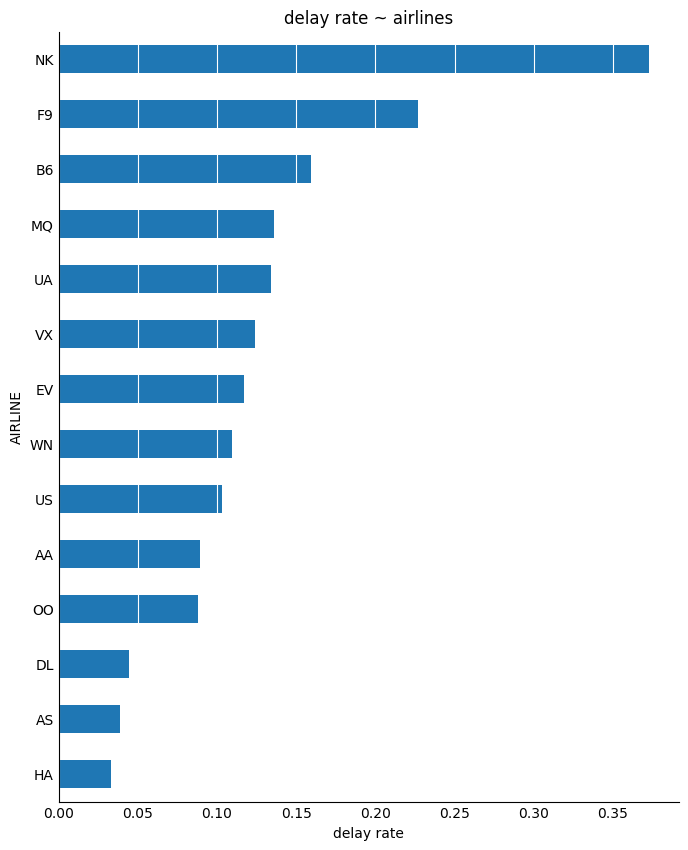

In [99]:
plt.figure(figsize=(8, 10))
ax = plt.gca()
airline_delay_rate = airline_delay_rate.sort_values()
airline_delay_rate.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
plt.xlabel('delay rate')
plt.title('delay rate ~ airlines')
sns.despine()

We can see delay rate (number of delay / number of flights of airlines) greatly depends on airlines. Now let's have a deeper look at the distribution of delay (ARRIVAL_DELAY) across the airlines.

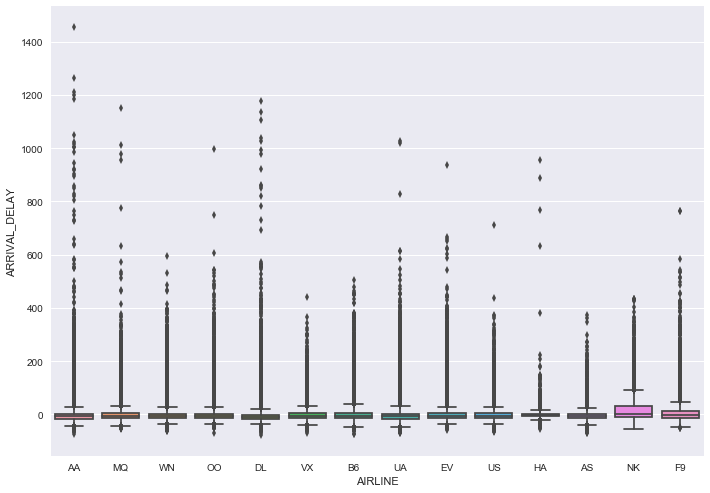

In [7]:
## delay-or-not
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x="AIRLINE", y="ARRIVAL_DELAY", data=df)

Consistent with the first graph, airlines such as NK, F9 has higher delay rate would also have relatively higher mean and larger 25%-75% quantile in length of delay. But we also notice some of the flight have lower delay rate though, they still have longer tail (right-skewed). This is because these airlines might have larger number of flights so there will be higher chance to have extreme event happen.

In [153]:
# transform schedule_departure into minute form

df['SCHED_DEP'] = df['SCHED_DEP'].apply(lambda x: int(x[-5:-3]) + int(x[-8:-6])* 60)
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,435,...,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN,False
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,1215,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,False
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,742,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,False
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,680,...,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN,False
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,850,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,False


We tranform the time format into minute based, numerical data. That is, 12am would start at 0. Then we want to see the relationship between the lenght of delay and time of departure (we use scheduled time here because it is unreasonable to make use of information after actual departure).

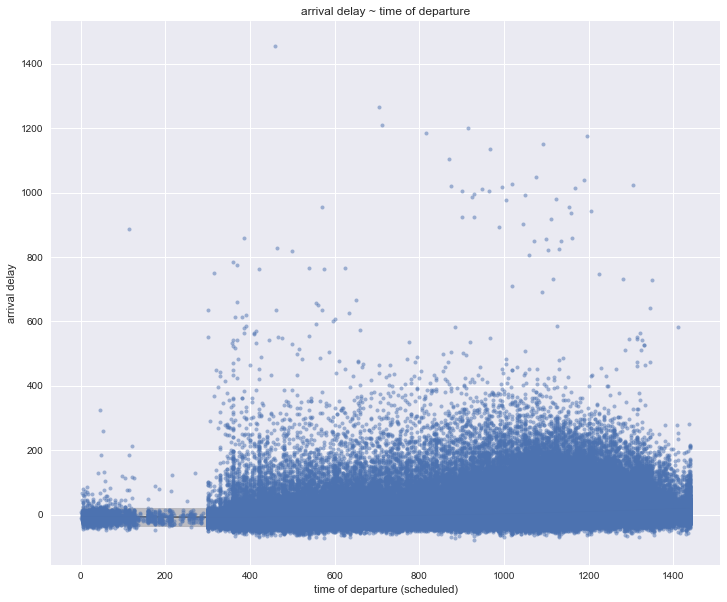

In [9]:
# delay ~ time of departure
plt.figure(figsize=(12, 10))
x = df.SCHED_DEP
y = df.ARRIVAL_DELAY
params = np.polyfit(x, y, 2)
xp = np.linspace(x.min(), x.max(), 20)
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'k', alpha=0.8, linewidth=1)
plt.plot(df.SCHED_DEP, df.ARRIVAL_DELAY, 'o', markersize=4, alpha=0.5)
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.2)
plt.xlabel('time of departure (scheduled)')
plt.ylabel('arrival delay')
plt.title('arrival delay ~ time of departure')

We can see the spread of length of delay is larger in the day time. Especially, there is an interval between 100 - 300 minute, i.e., 2am to 5am, such that the arrival_delay is relatively small. This is because there are fewer flights during this period, while greater number of flights would lead to airport traffic to be busy. 

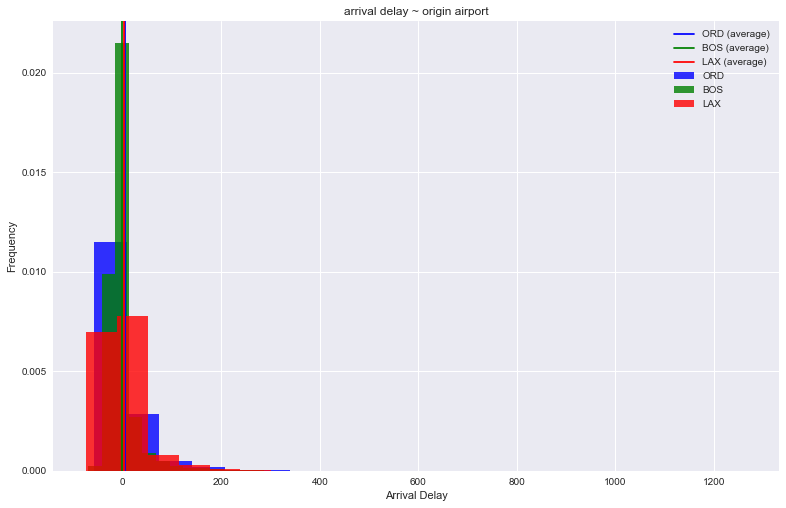

In [10]:
# arrival-delay ~ origin airport
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.27)
df[df['ORIGIN_AIRPORT']=='ORD']['ARRIVAL_DELAY'].plot.hist(alpha=0.8, bins=20, color = 'b',normed=True, label='ORD');
plt.axvline(x=df[df['ORIGIN_AIRPORT']=='ORD']['ARRIVAL_DELAY'].mean(), color='b', label='ORD (average)');
df[df['ORIGIN_AIRPORT']=='BOS']['ARRIVAL_DELAY'].plot.hist(alpha=0.8, bins=20, color = 'g', normed=True, label='BOS');
plt.axvline(x=df[df['ORIGIN_AIRPORT']=='BOS']['ARRIVAL_DELAY'].mean(), color='g', label='BOS (average)');
df[df['ORIGIN_AIRPORT']=='JFK']['ARRIVAL_DELAY'].plot.hist(alpha=0.8, bins=20, color = 'r',normed=True, label='LAX');
plt.axvline(x=df[df['ORIGIN_AIRPORT']=='JFK']['ARRIVAL_DELAY'].mean(), color='r', label='LAX (average)');
plt.xlabel('Arrival Delay');
plt.ylabel('Frequency');
plt.title('arrival delay ~ origin airport')
plt.legend(loc='upper right');

I first take a glance on the distribution of Arrival_delay across three airports: ORD, BOS and LAX. But the result is not obvious since the distribution is right-skewed. So I do the following exploration (and add two more airports: JFK and 10165 for comparisons).

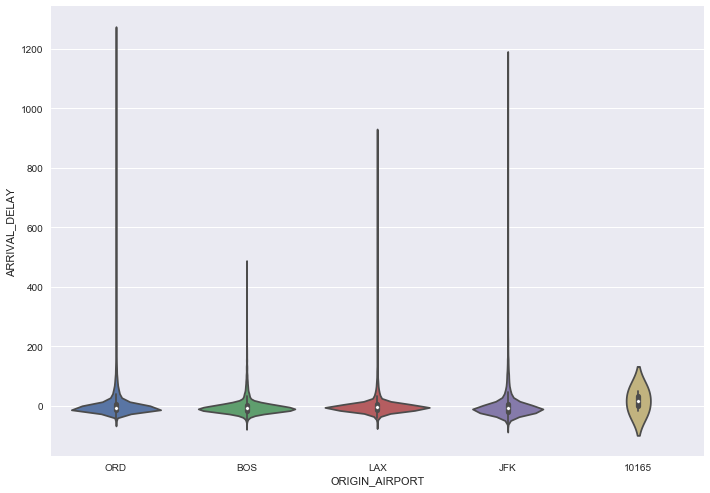

In [11]:
df_airport_1 = df[df.ORIGIN_AIRPORT == 'ORD']
df_airport_2 = df[df.ORIGIN_AIRPORT == 'BOS']
df_airport_3 = df[df.ORIGIN_AIRPORT == 'LAX']
df_airport_4 = df[df.ORIGIN_AIRPORT == 'JFK']
df_airport_5 = df[df.ORIGIN_AIRPORT == '10165']

df_airport = df_airport_1.append(df_airport_2, ignore_index=True)
df_airport = df_airport.append(df_airport_3, ignore_index=True)
df_airport = df_airport.append(df_airport_4, ignore_index=True)
df_airport = df_airport.append(df_airport_5, ignore_index=True)


fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.violinplot(x="ORIGIN_AIRPORT", y="ARRIVAL_DELAY", data=df_airport)

First, let's look at origin airport. We try to incorporate as much information as possible into the violin plot and we could see the shape of length of delay distributed very differently across airports. For example, BOS and 10165 might have fewer flights compared to other three airports, so their distribution of delay is more concetrated. However, the overall mean of delay at 10165 is the greatest. On the contrary, airports like ORD would have some chance to encounter super long delay, but its overall delay performance is ok.

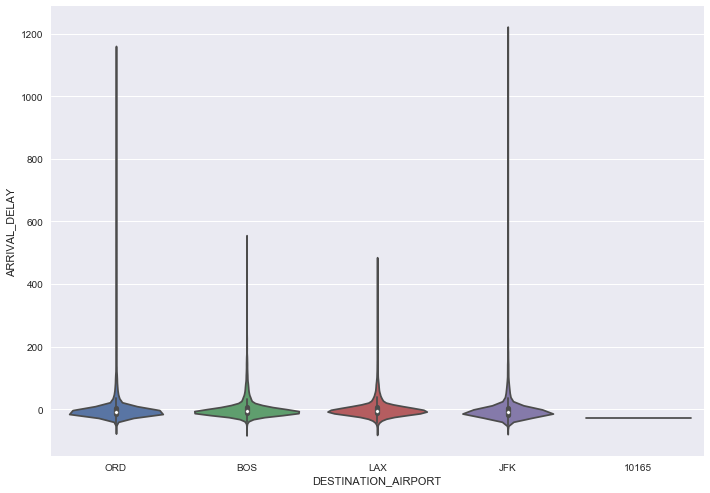

In [12]:
## delay ~ destination airport

df_airport_1 = df[df.DESTINATION_AIRPORT == 'ORD']
df_airport_2 = df[df.DESTINATION_AIRPORT == 'BOS']
df_airport_3 = df[df.DESTINATION_AIRPORT == 'LAX']
df_airport_4 = df[df.DESTINATION_AIRPORT == 'JFK']
df_airport_5 = df[df.DESTINATION_AIRPORT == '10165']

df_airport = df_airport_1.append(df_airport_2, ignore_index=True)
df_airport = df_airport.append(df_airport_3, ignore_index=True)
df_airport = df_airport.append(df_airport_4, ignore_index=True)
df_airport = df_airport.append(df_airport_5, ignore_index=True)


fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.violinplot(x="DESTINATION_AIRPORT", y="ARRIVAL_DELAY", data=df_airport)

The shape of delay across destination airport could be totally different. One example is 10165. As a destination airport, the sample size is super small and its mean of delay is significantly lower than as a origin airport. The reason might be there are fewer flights arrived at such an airport so that the airport traffic is great.

In [33]:
airport_count = df.groupby('ORIGIN_AIRPORT').DELAY_OR_NOT.count()
airport_delay = df.groupby('ORIGIN_AIRPORT').DELAY_OR_NOT.sum()
airport_delay_rate = airport_delay / airport_count

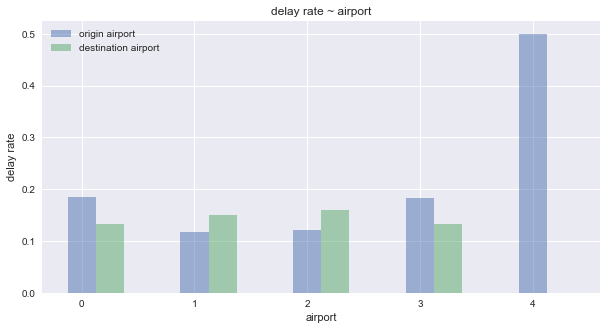

In [34]:
airport = []
airport_ls = ['ORD','BOS','LAX','JFK','10165']
airport.append(airport_delay_rate['ORD'])
airport.append(airport_delay_rate['BOS'])
airport.append(airport_delay_rate['LAX'])
airport.append(airport_delay_rate['JFK'])
airport.append(airport_delay_rate['10165'])
fig, ax = plt.subplots(figsize=(10,5))
pos = list(range(len(airport_ls)))
width = 0.25 
plt.bar(pos, airport, width, align='center', alpha=0.5, label = 'origin')


airport_count = df.groupby('DESTINATION_AIRPORT').DELAY_OR_NOT.count()
airport_delay = df.groupby('DESTINATION_AIRPORT').DELAY_OR_NOT.sum()
airport_delay_rate = airport_delay / airport_count


airport = []
airport_ls = ['ORD','BOS','LAX','JFK','10165']
airport.append(airport_delay_rate['ORD'])
airport.append(airport_delay_rate['BOS'])
airport.append(airport_delay_rate['LAX'])
airport.append(airport_delay_rate['JFK'])
airport.append(airport_delay_rate['10165'])
plt.bar([p + width for p in pos], airport, width, align='center', alpha=0.5, label = 'destination')

ax.set_xticks(pos, airport_ls)
ax.set_xlabel('airport')
ax.set_ylabel('delay rate')
ax.set_title('delay rate ~ airport')
plt.legend(['origin airport', 'destination airport'], loc='upper left')

We make a comparison (between origin airport and destination airport) of the delay rate over the above five airports. We could see delay rate also varies across airport. Therefore, we could expect airport to be an important predictor in our model.

In [38]:
## delay ~ airport traffic (number of flights)

traffic_count = df.groupby('ORIGIN_AIRPORT').DELAY_OR_NOT.count()
traffic_delay = df.groupby('ORIGIN_AIRPORT').DELAY_OR_NOT.sum()

It's hard to define airport traffic since they are so many confounding factors. Here based on the information we have, we could assume airport traffic is proportional to the number of flights at this airport. For each airport, we look at an overall data in year since the total number of flights/year at an airport could represent as an indicator of traffic.

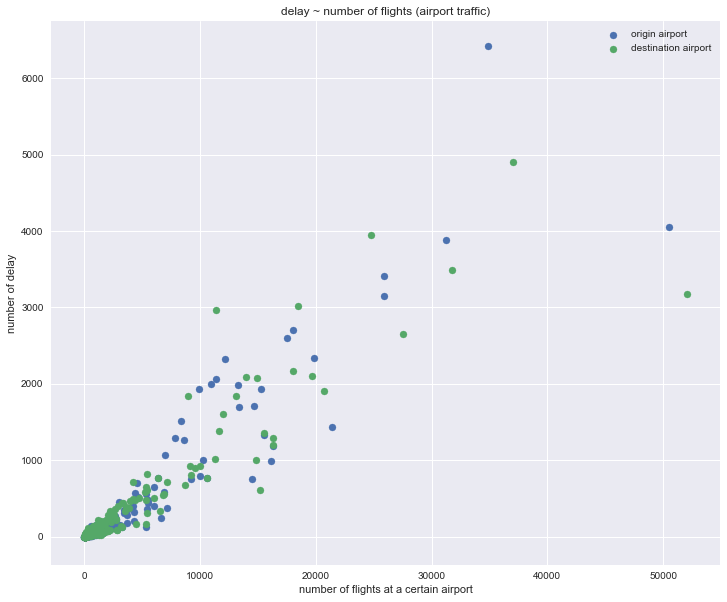

In [39]:
plt.figure(figsize=(12, 10))
plt.scatter(traffic_count, traffic_delay, label = 'origin airport')
traffic_count = df.groupby('DESTINATION_AIRPORT').DELAY_OR_NOT.count()
traffic_delay = df.groupby('DESTINATION_AIRPORT').DELAY_OR_NOT.sum()
plt.scatter(traffic_count, traffic_delay, label = 'destination airport')
plt.xlabel('number of flights at a certain airport')
plt.ylabel('number of delay')
plt.legend()
plt.title('delay ~ number of flights (airport traffic)')

We could see the number of delay is proportional to number of flights no matter for origin airport and destination airports. Therefore, we may infer that there are positive relationship between delay and airport traffic.

/Users/gwungwun/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """
/Users/gwungwun/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


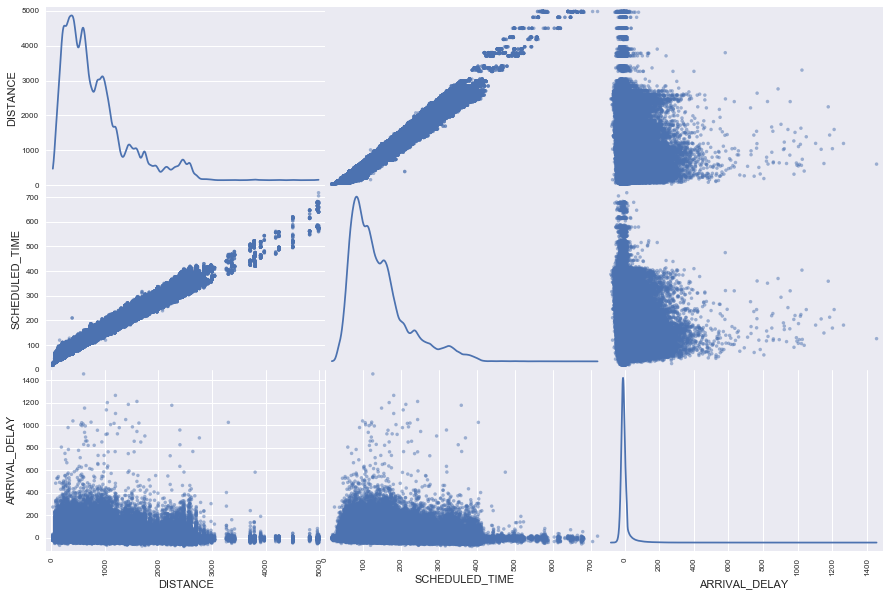

In [40]:
## delay ~ other numerical predictor (distance & scheduled_time)

from pandas.tools.plotting import scatter_matrix
fig, ax = plt.subplots(1,1, figsize=(15,10))
axes = scatter_matrix(df[['DISTANCE', 'SCHEDULED_TIME', 'ARRIVAL_DELAY']], alpha=0.5, diagonal='kde', ax=ax)
plt.show()

I also plot a figure to see relationship between length of delay and other numerical predictors (distance & scheduled_time). 

For distance, it satisfies with my guess in part(2) that longer distance flight might have shorter delay. Since they have longer distance to adjust the speed and usually they are international flight that most of them won't delay. The argument is similar for the case of scheduled time.

From the graph, we could also infer that there might be colinearility between scheduled time and distance. It satisfies our intuition that shorter flight takes shorter time.

In [46]:
# delay_rate ~ month
month_count = df.groupby('MONTH').DELAY_OR_NOT.count()
month_delay = df.groupby('MONTH').DELAY_OR_NOT.sum()
month_delay_rate = month_delay / month_count

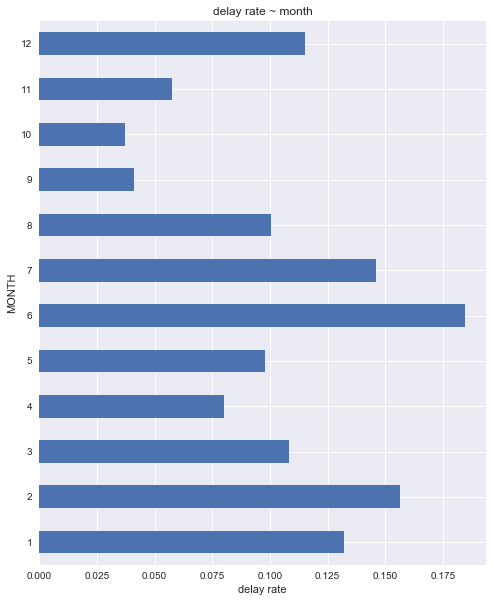

In [48]:
plt.figure(figsize=(8, 10))
ax = plt.gca()
#month_delay_rate = month_delay_rate.sort_values()
month_delay_rate.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
plt.xlabel('delay rate')
plt.title('delay rate ~ month')
sns.despine()

It seems that there would be higher delay rate during summer (June/July) and winter (December/January/February) vacation. The reason might be larger visitor flow rate and weather severity.

In [49]:
# delay_rate ~ day of week
day_count = df.groupby('DAY_OF_WEEK').DELAY_OR_NOT.count()
day_delay = df.groupby('DAY_OF_WEEK').DELAY_OR_NOT.sum()
day_delay_rate = day_delay / day_count

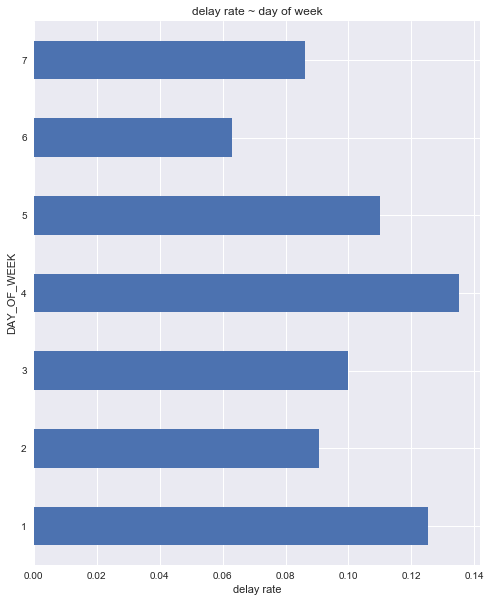

In [51]:
plt.figure(figsize=(8, 10))
ax = plt.gca()
day_delay_rate.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
plt.xlabel('delay rate')
plt.title('delay rate ~ day of week')
sns.despine()

Finally, I try to explore the relationship between delay rate and day of week. It is surprising that delay rate is relatively lower during weekend. We might make use of this information in the following question.

In [52]:
## 4. Classification model

## drop unnecessary variable
col_drop = ['DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'SCHED_ARR', 'ELAPSED_TIME', \
            'DEPARTURE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', \
            'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df = df.drop(col_drop, 1)
df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT
0,9,19,6,AA,ORD,LGA,435,1.0,733,135.0,False
1,10,28,3,AA,11298,13342,1215,-31.0,853,149.0,False
2,8,19,3,MQ,XNA,ORD,742,-21.0,522,108.0,False
3,12,1,2,WN,PHX,BWI,680,-14.0,1999,260.0,False
4,9,15,2,WN,MCI,DEN,850,-12.0,533,105.0,False


In [53]:
## labelencoder

le = preprocessing.LabelEncoder()
le.fit(df.ORIGIN_AIRPORT)
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].apply(lambda x: le.transform([x]))

In [54]:
le2 = preprocessing.LabelEncoder()
le2.fit(df.DESTINATION_AIRPORT)
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].apply(lambda x: le2.transform([x]))

In [55]:
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].apply(lambda x: x[0])
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].apply(lambda x: x[0])

In [56]:
df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT
0,9,19,6,AA,534,487,435,1.0,733,135.0,False
1,10,28,3,AA,81,193,1215,-31.0,853,149.0,False
2,8,19,3,MQ,625,533,742,-21.0,522,108.0,False
3,12,1,2,WN,545,356,680,-14.0,1999,260.0,False
4,9,15,2,WN,498,390,850,-12.0,533,105.0,False


There are several categorical variable in our model: ORIGIN/DESTINATION AIRPORT, MONTH, DAY, DAY_OF_WEEK and AIRLINE. Here we use two methods to deal with these categorial variables: labelencoder and dummy.

For origin/destination airport, since there are too many different categories in one column, if we use dummy directly there will be computational/fitting problem in the following regression model. So use labelencoder to give every airport a label.

For the other categorical variables, we use dummy variable to represent them (but also drop the first column since it could be represented as a linear combination of other predictors).

In [57]:
# preprocessing the data

## convert dummy variable

categorical_columns = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE']
numerical_columns = ['DISTANCE', 'SCHEDULED_TIME', 'SCHED_DEP']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT,MONTH_2,MONTH_3,MONTH_4,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,534,487,435,1.0,733,135.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,81,193,1215,-31.0,853,149.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,625,533,742,-21.0,522,108.0,False,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,545,356,680,-14.0,1999,260.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,498,390,850,-12.0,533,105.0,False,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
## create training/testing data set

np.random.seed(9001)
msk = np.random.rand(len(df)) < 0.75
train_df = df[msk]
test_df = df[~msk]

In [59]:
y_train_large = train_df.DELAY_OR_NOT.values
y_test_large = test_df.DELAY_OR_NOT.values

test_df.describe()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH_2,MONTH_3,MONTH_4,MONTH_5,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
count,200949.000000,200949.000000,200949.000000,200949.000000,200949.000000,200949.000000,200949.000000,200949.000000,200949.000000,200949.000000,...,200949.000000,200949.000000,200949.000000,200949.000000,200949.000000,200949.000000,200949.00000,200949.000000,200949.000000,200949.000000
mean,436.151436,435.518017,771.111038,-1.284321,815.794928,140.812923,0.066937,0.084529,0.086286,0.085037,...,0.094382,0.013745,0.015427,0.045877,0.014979,0.100195,0.08333,0.033511,0.010177,0.218717
std,127.600853,127.394596,282.734592,29.729138,599.902625,74.282305,0.249914,0.278180,0.280786,0.278937,...,0.292360,0.116430,0.123243,0.209220,0.121469,0.300260,0.27638,0.179967,0.100365,0.413377
min,0.000000,0.000000,3.000000,-69.000000,31.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,370.000000,369.000000,530.000000,-14.000000,373.000000,85.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,457.000000,456.000000,750.000000,-7.000000,644.000000,122.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,534.000000,533.000000,1000.000000,3.000000,1052.000000,172.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,627.000000,626.000000,1439.000000,1027.000000,4983.000000,679.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [60]:
train_df2 = train_df[train_df.DELAY_OR_NOT == True]
test_df2 = test_df[test_df.DELAY_OR_NOT == True]

train_df = train_df.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)
test_df = test_df.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)

In [61]:
## standardize numerical column

X_train_large = train_df.iloc[:,:].values
X_test_large = test_df.iloc[:,:].values

std_scale = preprocessing.StandardScaler().fit(X_train_large)

X_train_large = std_scale.transform(X_train_large)
X_test_large = std_scale.transform(X_test_large)

We create a training set and testing set for the whole dataset. Then in the following, we are going to split the training set into two parts for train/validation/testing in subsamples.

In [62]:
## sub-sample

np.random.seed(6006)
msk_2 = np.random.rand(len(train_df)) < 0.5
X_train = X_train_large[msk_2]
y_train = y_train_large[msk_2]
X_test = X_train_large[~msk_2]
y_test = y_train_large[~msk_2]

In [63]:
# logistic regression cv

logregcv = LogisticRegressionCV(random_state = 123) # By default LBGFS induces L2 norm.
logregcv.fit(X_train, y_train)
y_hat_train = logregcv.predict(X_train)
y_hat_test = logregcv.predict(X_test)
print("Train accuracy: ", accuracy_score(y_train, y_hat_train))
print("Test accuracy: ", accuracy_score(y_test, y_hat_test))

Train accuracy:  0.907411953608
Test accuracy:  0.907439846642


In [66]:
conf_mat = confusion_matrix(y_test, y_hat_test)
conf_df = pd.DataFrame(conf_mat, columns = ['y_hat=false', 'y_hat = true'], index = ['y=false', 'y=true'])
conf_df

,y_hat=false,y_hat = true
y=false,269548,2196
y=true,25809,5007


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_hat_train))

             precision    recall  f1-score   support

      False       0.91      0.99      0.95    270706
       True       0.70      0.16      0.26     30726

avg / total       0.89      0.91      0.88    301432



We first look at the overall accuracy. It is relatively high (nearly 0.9 for both train/test set) because the model is biased and most of the samples are NOT DELAY and our logistic regression model (using cross validation) works well to predict true negative. 

(True Positive Rate for Fitted:  0.162480529595,
True Negative Rate for Fitted:  0.991918864814)

But we need some other metric to assess the fitness of our biased data.

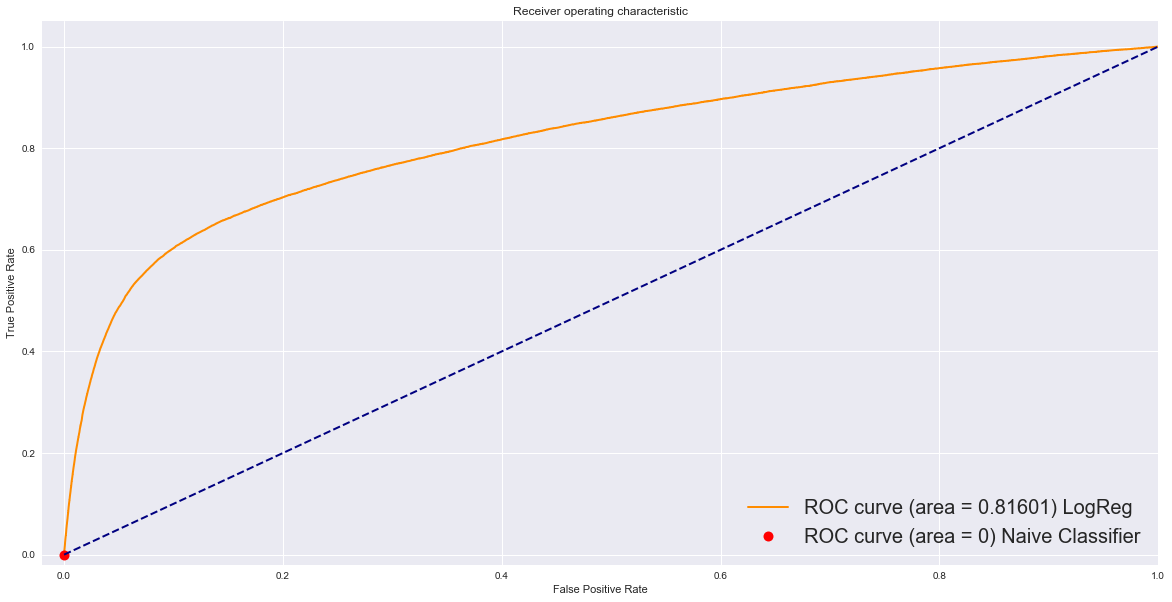

In [70]:
preds = logregcv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.5f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show()

ROC curve and AUC is a good metric to measure a biased data set. Ideally, we want the area under the ROC curve (AUC) to be 1. We would like the curve to rise very fast and to capture as much of the top left area as we can. For the logistic regression model (using cv), we achieve an AUC as 0.81601.

## 5. Importance of factors

In the following, we want to determine whether the coefficients estimated by the multiple logistic regression in the previous problem are significantly different from zero at a significance level of 95%. Here we use bootstrapping with 100 boostrap samples/iterations.

In [77]:
## 5. Importance of factors

b_logreg = logregcv.coef_[0]

iterations = 100

b_logreg_boot = np.zeros((len(X_train[0]), iterations))

for i in range(iterations):
    # sample with replacement from X_train
    boot_rows = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_train_boot = X_train[boot_rows]
    y_train_boot = y_train[boot_rows]

    # fit
    logreg_boot = LogisticRegressionCV(random_state = 123)
    logreg_boot.fit(X_train_boot, y_train_boot)
    b_logreg_boot[:,i] = logreg_boot.coef_


In [78]:
# construct confidence intervals
b_logreg_ci_upper = np.percentile(b_logreg_boot, 97.5, axis=1)
b_logreg_ci_lower = np.percentile(b_logreg_boot, 2.5, axis=1)

# ct significant predictors
sig_b_ct = 0

# if ci contains 0, then insignificant
for i in range(len(X_train[0])):
    if b_logreg_ci_upper[i]<0 or b_logreg_ci_lower[i]>0:
        sig_b_ct += 1

print("Significant coefficents at 5pct level = %i / %i" % (sig_b_ct, len(X_train[0])))

Significant coefficents at 5pct level = 49 / 65


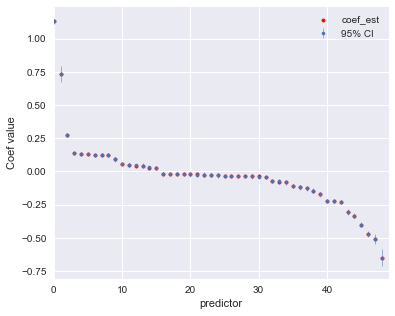

In [80]:
sig_b = []

# if ci contains 0, then insignificant
for i in range(len(X_train[0])):
    if b_logreg_ci_upper[i]<0 or b_logreg_ci_lower[i]>0:
        row={}
        row["predictor"] = train_df.columns[i]
        row["coef"] = b_logreg[i]
        row["CI 2.5"] = b_logreg_ci_lower[i]
        row["CI 97.5"] = b_logreg_ci_upper[i]
        sig_b.append(row)
    
sig_b_df = pd.DataFrame(sig_b)
sig_b_df = sig_b_df.sort_values("coef", ascending=False)
sig_b_df[["predictor","coef","CI 2.5","CI 97.5"]].head()

# plot
plt.figure(figsize=(8,5))
plt.errorbar(range(sig_b_df.shape[0]), 
             0.5*sig_b_df["CI 97.5"]+0.5*sig_b_df["CI 2.5"], 
             yerr=0.5*(sig_b_df["CI 97.5"]-sig_b_df["coef"])+0.5*(sig_b_df["coef"]-sig_b_df["CI 2.5"]),
             fmt='.',
             marker=None,
             elinewidth=0.5,
             label="95% CI"
         )
plt.scatter(range(sig_b_df.shape[0]), sig_b_df["coef"], color='red', label="coef_est", marker='.')
plt.xlim((0,sig_b_df.shape[0]))
plt.xlabel("predictor")
plt.ylabel("Coef value")
plt.legend()

In [81]:
sig_b_df

,CI 2.5,CI 97.5,coef,predictor
2,1.114287,1.145875,1.130342,SCHED_DEP
4,0.673531,0.796086,0.736592,SCHEDULED_TIME
44,0.262208,0.281997,0.272833,AIRLINE_NK
41,0.125690,0.145969,0.135449,AIRLINE_F9
45,0.121994,0.147971,0.134723,AIRLINE_UA
43,0.118345,0.142882,0.128892,AIRLINE_MQ
40,0.111031,0.141662,0.126921,AIRLINE_EV
38,0.114150,0.136883,0.125813,AIRLINE_B6
9,0.110612,0.137901,0.123405,MONTH_6
48,0.072880,0.109734,0.093901,AIRLINE_WN


We conclude that 49 out of our 65 predictors in the model are significant/important related to whether a flight is delayed. Their 95% quantile do not conclude 0. It seems that the 95% quantile is narrow because I choose relatively large training samples.

The summary of important predictors supports our conjecture in the EDA part. For example, the significant factors with positive coefficient includes scheduled departure, scheduled time, top airline and month have highest delay rate. Here scheduled time has positive coefficient might be its colinearity of distance, which has negative coefficient.

The significant factors with negative coefficient includes distance, top month/day of week have highest delay rate.

Also certain important month/day_of_week/airline also appear in the list of important factors. Origin and destination airport is also significant in our model.

In [82]:
## 6. Evaluate model on test data & plot predictions across airlines

y_hat_test_large = logregcv.predict(X_test_large)

print("Test accuracy excluding training and testing data", accuracy_score(y_test_large, y_hat_test_large))

conf_mat_large = confusion_matrix(y_test_large, y_hat_test_large)
conf_df_large = pd.DataFrame(conf_mat_large, columns = ['y_hat=false', 'y_hat = true'], index = ['y=false', 'y=true'])
conf_df_large

Test accuracy excluding training and testing data 0.906921656739


,y_hat=false,y_hat = true
y=false,178918,1466
y=true,17238,3327


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test_large, y_hat_test_large))

             precision    recall  f1-score   support

      False       0.91      0.99      0.95    180384
       True       0.69      0.16      0.26     20565

avg / total       0.89      0.91      0.88    200949



In [84]:
print("True Positive Rate for Fitted: ", float(conf_mat_large[1][1])/(conf_mat_large[1][1]+ conf_mat_large[1][0]))
print("True Negative Rate for Fitted: ", float(conf_mat_large[0][0])/(conf_mat_large[0][0] + conf_mat_large[0][1]))

True Positive Rate for Fitted:  0.16177972283
True Negative Rate for Fitted:  0.991872893383


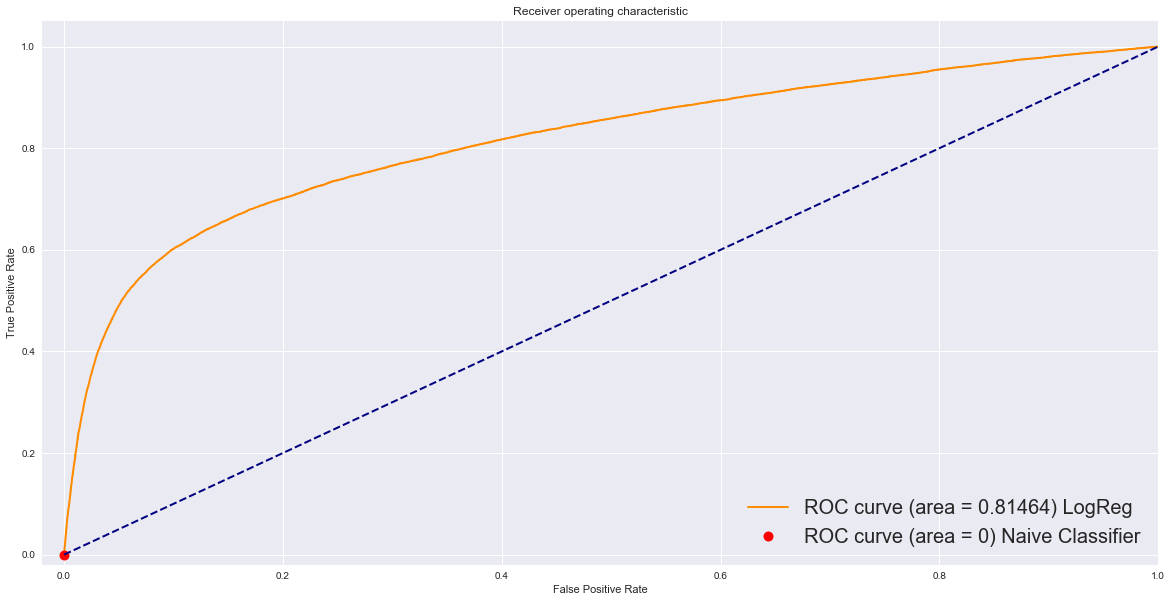

In [85]:
preds_large = logregcv.predict_proba(X_test_large)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_large, preds_large)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_large, [0 for y in y_test_large])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.5f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show()

The accuracy/ROC cuve/AUC result is similar to part(4). The reason might be the sample size is large enough and we randomly sample from it, and we use cross validation to train and select model. 

In [86]:
df2 = pd.read_csv('data/cs109a_midterm.csv')
df2 = df2[~msk]

In [87]:
df2['DELAY_OR_NOT_pred'] = y_hat_test_large
df2.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT_pred
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,False
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,False
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,False
7,2015-01-26,1,26,1,DL,1724,N951DL,BDL,ATL,18:13:00,...,-5.0,859,172.0,157.0,NaN,NaN,NaN,NaN,NaN,False
8,2015-09-17,9,17,4,VX,162,N639VA,LAX,EWR,08:25:00,...,-21.0,2454,325.0,307.0,NaN,NaN,NaN,NaN,NaN,False


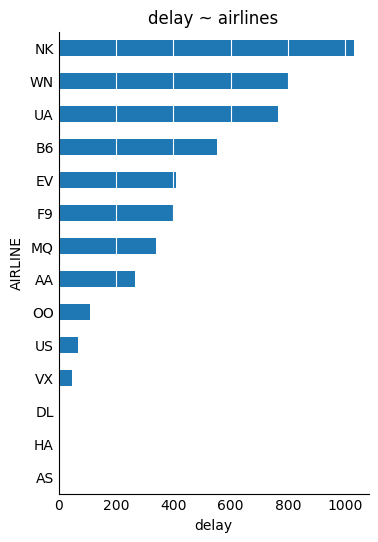

In [128]:
# delay ~ airlines
airline_logreg = df2.groupby('AIRLINE').DELAY_OR_NOT_pred.sum()
plt.figure(figsize=(8, 10))
ax = plt.gca()
airline_logreg = airline_logreg.sort_values()
airline_logreg.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
plt.xlabel('delay')
plt.title('delay ~ airlines')
sns.despine()

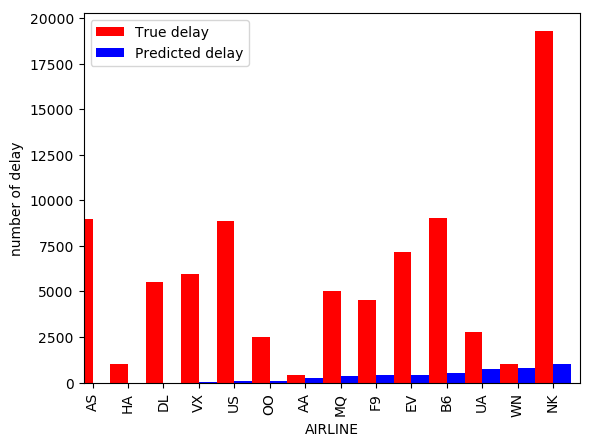

In [132]:
airline_compare = df.groupby('AIRLINE').DELAY_OR_NOT.sum()
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()

fig = plt.figure()

ax = airline_compare.plot(kind = 'bar',  color = 'r', position=1, label= 'True delay')
airline_logreg.plot(kind = 'bar', color = 'b', position=0, label = 'Predicted delay')
plt.ylabel('number of delay')
plt.legend()
plt.show()

It is unreasonable to look at number of delay instead of delay rate. So in the following, I also make a comparison of delay rate.

In [133]:
# delay_rate ~ airlines
airline_count_2 = df2.groupby('AIRLINE').DELAY_OR_NOT_pred.count()
airline_delay_2 = df2.groupby('AIRLINE').DELAY_OR_NOT_pred.sum()
airline_delay_rate_2 = airline_delay_2 / airline_count_2

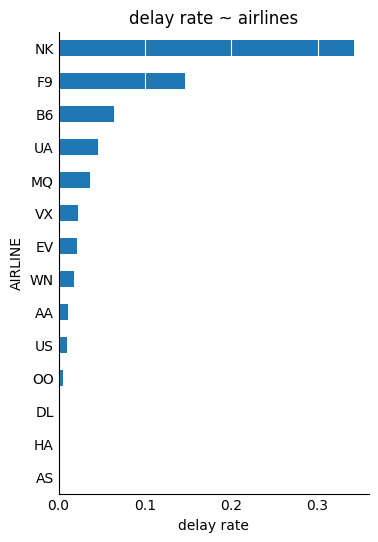

In [134]:
plt.figure(figsize=(8, 10))
ax = plt.gca()
airline_delay_rate_2 = airline_delay_rate_2.sort_values()
airline_delay_rate_2.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
plt.xlabel('delay rate')
plt.title('delay rate ~ airlines')
sns.despine()

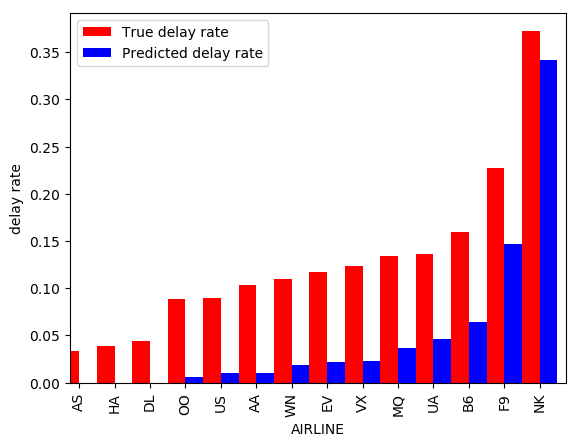

In [135]:
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()

fig = plt.figure()

ax = airline_delay_rate.plot(kind = 'bar',  color = 'r', position=1, label= 'True delay rate')
airline_delay_rate_2.plot(kind = 'bar', color = 'b', position=0, label = 'Predicted delay rate')
plt.ylabel('delay rate')
plt.legend()
plt.show()

Although the logistic regression model is not able to predict delay rate itself very accurately, it provides a right order of which airline would have higher delay rate.

#### In the following, we build model to predict length of delay (log scale). We try three different models: OLS, Ridge regression (using CV) and LASSO regression (using CV).

In [136]:
## 7. Regression model
## log_trasnform
train_df2['ARRIVAL_DELAY'] = train_df2['ARRIVAL_DELAY'].apply(lambda x : np.log(x))
test_df2['ARRIVAL_DELAY'] = test_df2['ARRIVAL_DELAY'].apply(lambda x : np.log(x))

In [137]:
y_train_2 = train_df2.ARRIVAL_DELAY.values
y_test_2 = test_df2.ARRIVAL_DELAY.values

In [138]:
train_df2 = train_df2.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)
test_df2 = test_df2.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)

In [139]:
X_train_2 = train_df2.iloc[:,:].values
X_test_2 = test_df2.iloc[:,:].values

In [140]:
std_scale_2 = preprocessing.StandardScaler().fit(X_train_2)
X_train_2 = std_scale.transform(X_train_2)
X_test_2 = std_scale.transform(X_test_2)

In [141]:
clf = RidgeCV(fit_intercept=True, normalize=True)
clf.fit(X_train_2, y_train_2)
print('Ridge Train Score', clf.score(X_train_2, y_train_2))
print('Ridge Test Score', clf.score(X_test_2, y_test_2))

Ridge Train Score 0.0396178915542
Ridge Test Score 0.0358379179003


In [142]:
clf = LinearRegression(fit_intercept=True, normalize=True)
clf.fit(X_train_2, y_train_2)
print('ols Train Score', clf.score(X_train_2, y_train_2))
print('ols Test Score', clf.score(X_test_2, y_test_2))

ols Train Score 0.0432763950637
ols Test Score 0.0371993999031


In [143]:
clf = LassoCV(fit_intercept=True, normalize=True)
clf.fit(X_train_2, y_train_2)
print('Lasso Train Score', clf.score(X_train_2, y_train_2))
print('Lasso Test Score', clf.score(X_test_2, y_test_2))

Lasso Train Score 0.0432600042564
Lasso Test Score 0.0373620166615


Using the predictors we have in the previous model, we try three different model to fit and predict length of delay. For both training/testing data, the scores for lasso and ols are almost the same, which are slightly higher than ridge regression. However, it seems that the $R^2$ for both training/testing data are low. Also, there is no huge gap between training score and testing score. That means, our model doesn't suffer from overfitting but it may need more predictors. 

In the following, we try to add polynomial/interaction terms to increase number of predictors.

In [144]:
x_inter = PolynomialFeatures(degree=2, interaction_only=False).fit_transform(X_train_2)
interactive_test = PolynomialFeatures(degree=2, interaction_only=False).fit_transform(X_test_2)

In [147]:
ols_new = LinearRegression(fit_intercept=True, normalize=True)
ols_new.fit(x_inter, y_train_2)
print('ols Train Score', ols_new.score(x_inter, y_train_2))
print('ols Test Score', ols_new.score(interactive_test, y_test_2))

ols Train Score 0.0914741654516
ols Test Score 0.0402182877052


In [145]:
clf_inter = RidgeCV(fit_intercept=True, normalize=True)
clf_inter.fit(x_inter, y_train_2)
print('Ridge Train Score', clf_inter.score(x_inter, y_train_2))
print('Ridge Test Score', clf_inter.score(interactive_test, y_test_2))

Ridge Train Score 0.0965236281538
Ridge Test Score 0.0527132497828


In [146]:
clf_inter_lasso = LassoCV(fit_intercept=True, normalize=True, max_iter= 200)
clf_inter_lasso.fit(x_inter, y_train_2)
print('Lasso Train Score', clf_inter_lasso.score(x_inter, y_train_2))
print('Lasso Test Score', clf_inter_lasso.score(interactive_test, y_test_2))

/Users/gwungwun/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso Train Score 0.0825069918052
Lasso Test Score 0.0555041876101


By adding polynomial/interaction terms to degree 2, we achieve a higher score in all the three models. Although this might lead to overfitting to some degree, we could fix it by regularization. Especially, the test $R^2$ is higher in the ridge/lasso model because their penality on larger coefficients. Lasso prefers a more sparse model so it may lead to a higher score in test data.




### 209 Additional questions
1. (10pts) Engineer two additional features that will help improve the classification model's performance.
2. (5pts) Add one additional feature from a data source not given to you.  Do this only after you complete the rest of the exam.

## Deliverable: 
A well presented notebook with well structured and documented code to answer questions 1-7 (plus additional questions for 209 students) with brief explanations and/or clarifications (10pts for overall presenation). The last cell should contain the report for question 8.



## Hints
1. For the classification model, an AUC of approximately 0.6 should be your base model. 
2. $R^2>0.03$ for the regression is good, $R^2>0.05$ very good, and $R^2>0.1$ is impressive (measured on the log scale). 

#### Add two additional features

In order to improve the model

In [154]:
np.random.seed(9001)
msk = np.random.rand(len(df)) < 0.75
train_df_3 = df[msk]
test_df_3 = df[~msk]

y_train_large_3 = train_df_3.DELAY_OR_NOT.values
y_test_large_3 = test_df_3.DELAY_OR_NOT.values

In [155]:
train_df3 = train_df_3[train_df_3.DELAY_OR_NOT == True]
test_df3 = test_df_3[test_df_3.DELAY_OR_NOT == True]

train_df_3 = train_df_3.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)
test_df_3 = test_df_3.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'], 1)

In [156]:
train_df_3.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DEPARTURE_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,435,10:30:00,9.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,680,17:40:00,11.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN
5,2015-01-29,1,29,4,WN,2784,N966WN,DTW,MDW,555,09:45:00,-5.0,228,90.0,76.0,NaN,NaN,NaN,NaN,NaN
6,2015-01-07,1,7,3,OO,5181,N776SK,LAX,ASE,577,12:41:00,0.0,737,124.0,131.0,NaN,NaN,NaN,NaN,NaN
9,2015-11-24,11,24,2,DL,2185,N379DA,FLL,JFK,480,10:46:00,0.0,1069,166.0,172.0,NaN,NaN,NaN,NaN,NaN


In [157]:
train_df_3.columns

Index(['DATE', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP',
       'SCHED_ARR', 'DEPARTURE_DELAY', 'DISTANCE', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [158]:
X_train_large_3 = train_df_3.iloc[:,:].values
X_test_large_3 = test_df_3.iloc[:,:].values

std_scale = preprocessing.StandardScaler().fit(X_train_large_3)

X_train_large_3 = std_scale.transform(X_train_large_3)
X_test_large_3 = std_scale.transform(X_test_large_3)

ValueError: could not convert string to float: '19:49:00'

In [63]:
tmp = X_train_large_3[:, -15] * X_train_large_3[:, 16]
x_inter = np.concatenate((X_train_large_3, tmp.reshape(-1, 1)), axis = 1)
tmp = X_train_large_3[:, -16] * X_train_large_3[:, 16]
x_inter = np.concatenate((x_inter, tmp.reshape(-1, 1)), axis = 1)

In [64]:
## sub-sample

np.random.seed(6006)
msk_4 = np.random.rand(len(x_inter)) < 0.5
X_train = x_inter[msk_4]
y_train = y_train_large_3[msk_4]
X_test = x_inter[~msk_4]
y_test = y_train_large_3[~msk_4]

In [65]:
# logistic regression cv

logregcv_new = LogisticRegressionCV(random_state = 123) # By default LBGFS induces L2 norm.
logregcv_new.fit(X_train, y_train)
y_hat_train = logregcv_new.predict(X_train)
y_hat_test = logregcv_new.predict(X_test)
print("Train accuracy: ", accuracy_score(y_train, y_hat_train))
print("Test accuracy: ", accuracy_score(y_test, y_hat_test))

Train accuracy:  0.907491573556
Test accuracy:  0.90752908514


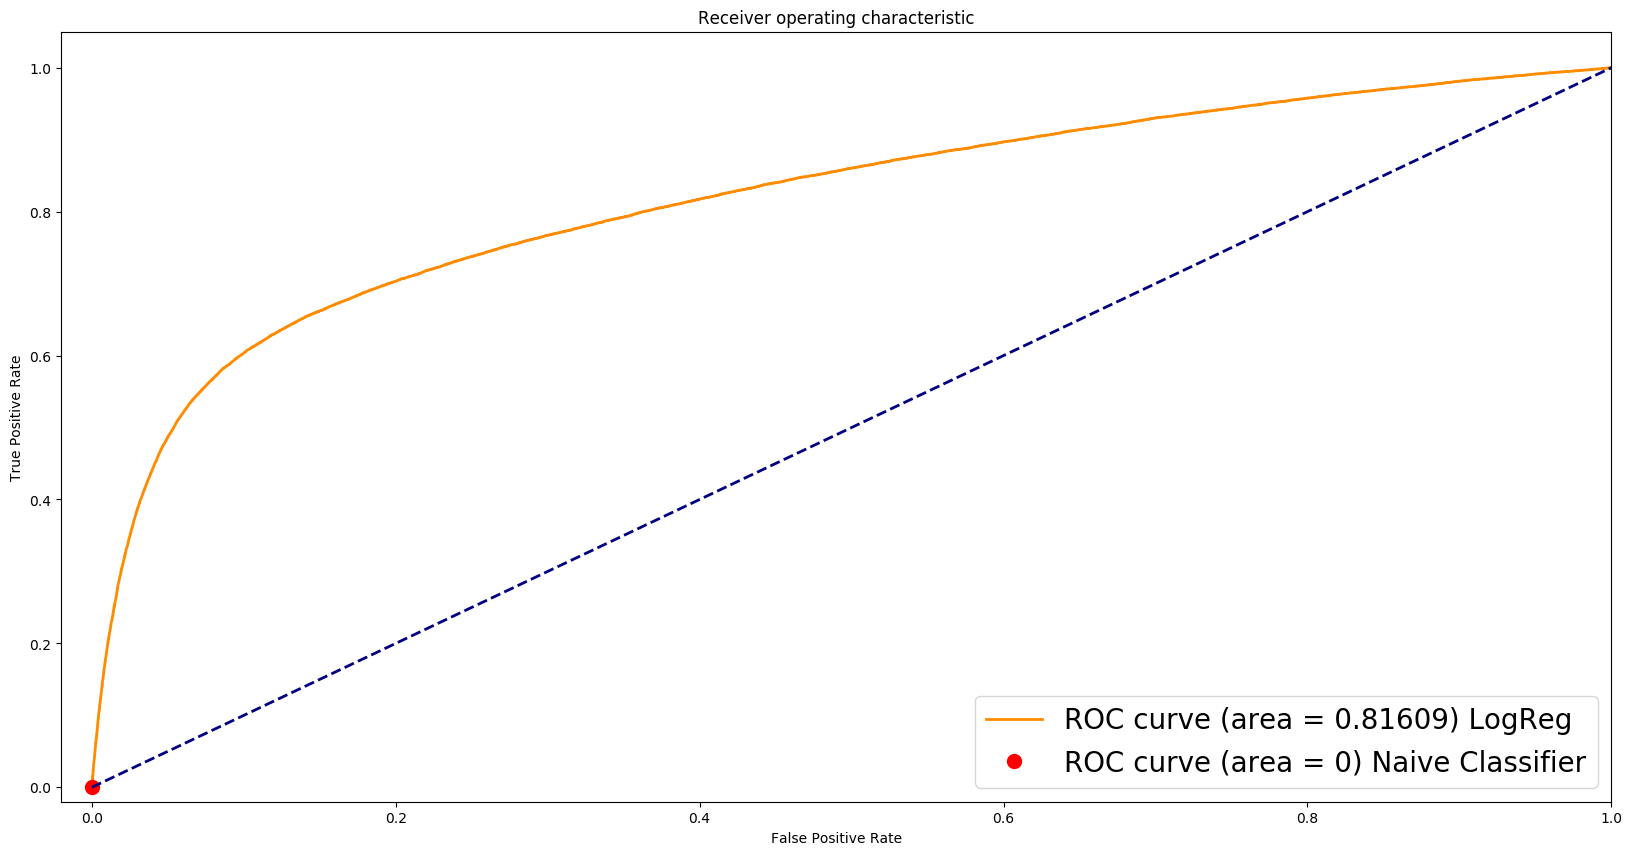

In [66]:
preds = logregcv_new.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.5f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show()

In [67]:
tmp = X_test_large_3[:, -15] * X_test_large_3[:, 16]
x_inter_test = np.concatenate((X_test_large_3, tmp.reshape(-1, 1)), axis = 1)
tmp = X_test_large_3[:, -16] * X_test_large_3[:, 16]
x_inter_test = np.concatenate((x_inter_test, tmp.reshape(-1, 1)), axis = 1)

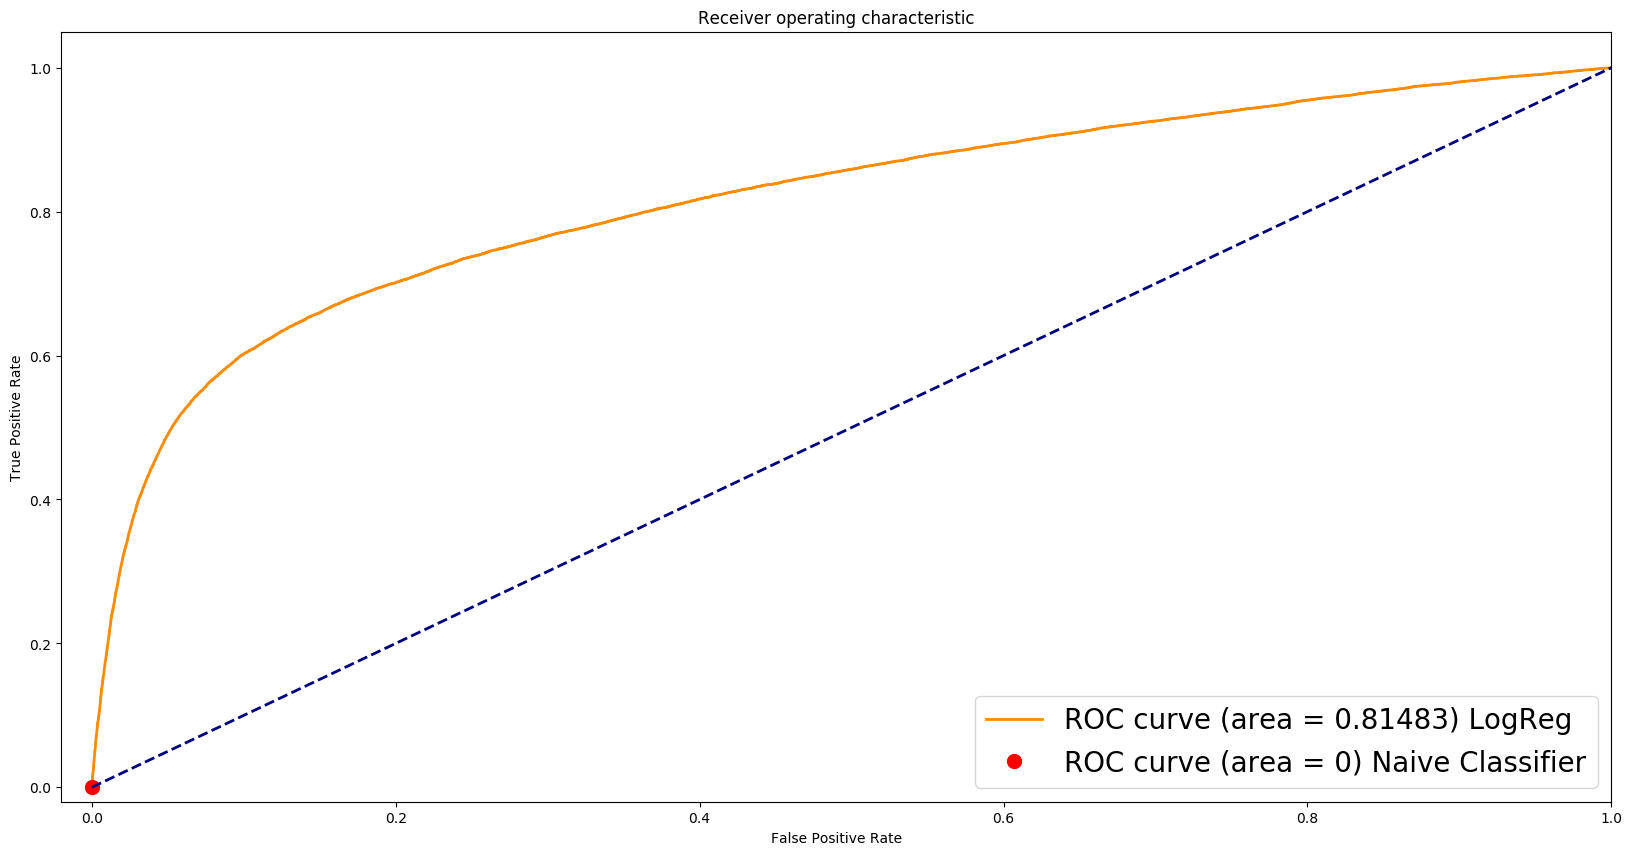

In [68]:
preds_large = logregcv_new.predict_proba(x_inter_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_large_3, preds_large)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_large_3, [0 for y in y_test_large_3])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.5f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show()

#### Adding one more features

Since there is security delay described in the original data (SECURITY_DELAY), I try to search some information about security at different airports.

source: http://data.ap.org/projects/2016/airport-security-breaches/

Here I make use of airport security breach data in 2015 provided by Associated Press. "Information on 2015/2016 breaches came both from airports and from records in a Transportation Security Administration database which AP received under a long-running Freedom of Information Act request." Security breach could be regarded as an indicator of airport secuirty. More security breach reported would lead to a longer time of security check, which might eventually cause delay.

I utilize the UPDATED SECURITY BREACHES column in the last table from the source website, which is the updated security breaches in 2015 associated with their airports. The information is arranged in a csv file 'data/cs109a_midterm.csv'.

Since there are only reported breach for certain airports, I merge this security breach information into the original dataframe and fill in NAN by 0. This makes practical sense since they have no security breaches.